# Peter De Jong attractors

## Import required packages

In [1]:
using ImageView, TestImages, Images, Colors, FileIO, PerceptualColourMaps, BenchmarkTools, Printf, ColorSchemes
using StatsBase
include("attractors.jl")

peter_de_jong (generic function with 2 methods)

In [13]:
using Distributed
processes = 5
addprocs(processes-1)
@everywhere begin
    include("attractors.jl")
end

In [2]:
scheme = ColorSchemes.linear_ternary_blue_0_44_c57_n256

In [3]:
scheme2 = ColorSchemes.winter

In [8]:
RGB.(cmap("D4"))

In [5]:
RGB.(cmap("CBTL2"))

In [6]:
RGB.(cmap("CBL2", N=2000))

## Define functions to calculate the attractors and make the images

In [7]:
"""
Searches for an interestin set of parameters for the attractor
"""
function search_params(len, side)
    pixels = side^2
    X = [1., 1.]
    maxi = 100
    
    # arrays to hold interesting parameter sets
    grids = []
    params = []
    found = 0
    
    while found < len
        # take a random set of parameters
        param = rand(UInt16, 4)/6000
        # calculate the grid
        grid = calc_attractor(X, param, side, maxi)
        # calculate how many pixels are above 5% and above 50%
        amount1 = size(grid[grid .> 5])[1]
        amount2 = size(grid[grid .> 50])[1]
        
        if (amount1 < 0.1*pixels) & (amount2 > 0.0001*pixels)
            print("found: $(found+1). ")
            push!(params, param)
            push!(grids, grid)
            found += 1
        end
    end
    return params, grids
end

search_params

## Make High-res plot of interesting attractors

**Unilumounus color scale to use as background color**

In [6]:
scale = cmap("I3", N=500);
scale = RGB.(scale)

**uniform colors to use as background**

In [5]:
# vermillion scale (#f4320c)
vermillion = [244,50,12]/244

3-element Array{Float64,1}:
 1.0                
 0.20491803278688525
 0.04918032786885246

### Calculate the histogram for the attractor

In [17]:
# sidelength in pixels of image
SIDE = 3000
# the max value for a pixel and the max value reached
MAX = 6000

param = [7.3305,0.8646666666666667, 0.37083333333333335, 6.1305]
grid = peter_de_jong(param, MAX, SIDE);

Make a RGB-background for the non-uniform color plots

### Vermillion plots

Uniform color plot

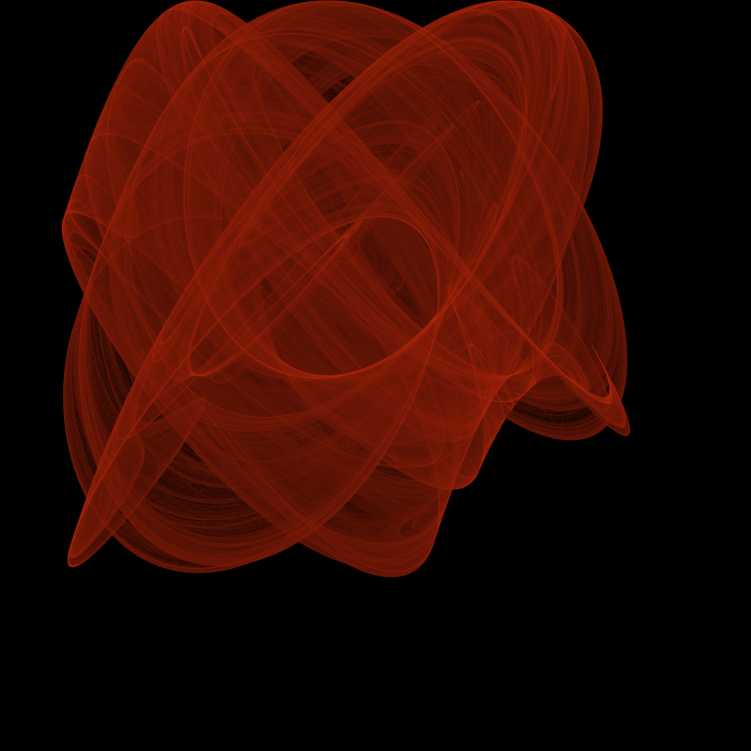

In [7]:
# the color to use
COLOR = vermillion
# initialize other grids for the map
GAMMA = fill(0.15, SIDE, SIDE)
rgb = fill(vermillion, SIDE, SIDE)
N_MAX = fill(MAX, SIDE, SIDE)
# make the plots, both with white and black background
map(linear_color, grid, N_MAX, GAMMA, rgb)

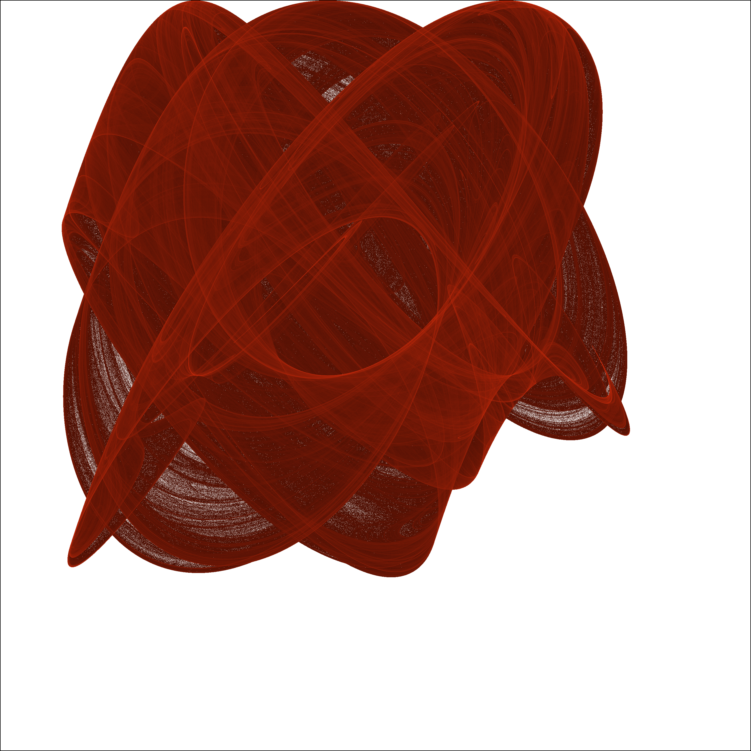

In [8]:
map(linear_color_white, grid, N_MAX, GAMMA, rgb)

### Non-uniform color plot

In [9]:
# initialize the RGB-grid
rgb = fill(RGB(0,0,0), SIDE, SIDE)

# function to calculate the index of the colorscale to use at
# the position (i, j)
function calc_index(i, j, MAX, SIDE)
    scalew = SIDE/20
    scaleh = MAX/25
    temp = scaleh + i + scaleh*sin((i+j)/scalew)
    return ceil(Int64, MAX * temp/(SIDE+2*scaleh))
end

# fill the RGB-grid with the correct background colors
for i=1:SIDE
    for j=1:SIDE
            rgb[i,j] = scale[calc_index(i, j, 500, SIDE)]
    end
end

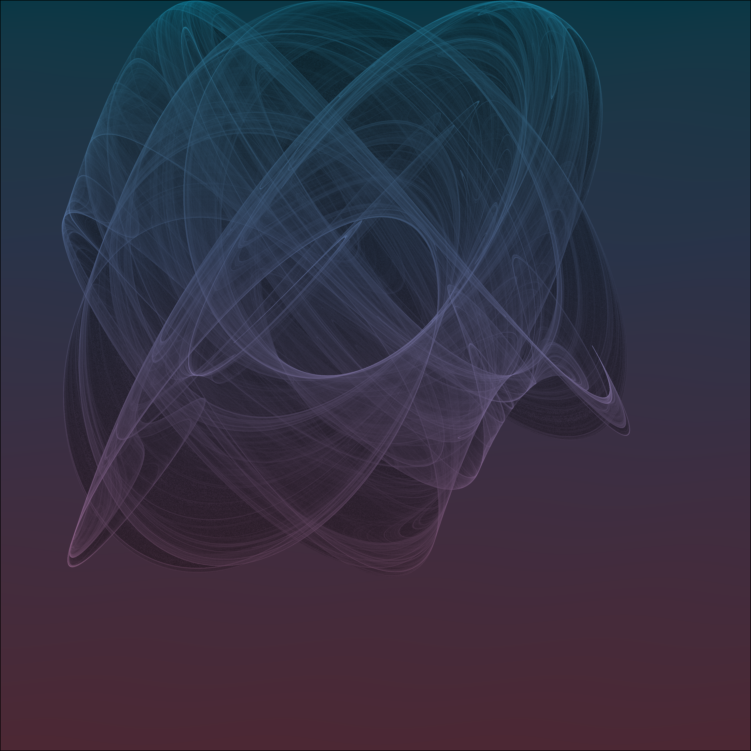

In [10]:
GAMMA = fill(0.2, SIDE, SIDE)
N_MAX = fill(MAX, SIDE, SIDE)
base = ones(SIDE, SIDE)*0.3
image = map(color_map_background, grid, N_MAX, GAMMA, rgb, base)

### Plot using colorschemes

In [16]:
# sidelength in pixels of image
SIDE = 3000
# the max value for a pixel and the max value reached
MAX = 6000

param = [2.7325, 2.038666666666667, 0.33566666666666667, 3.627666666666667]
grid = peter_de_jong(param, MAX, SIDE);

In [17]:
SCHEME1 = fill(scheme, SIDE, SIDE);
SCHEME2 = fill(scheme2,SIDE, SIDE);
sorted = sort(vec(grid));
cutoff = floor(Int64, percentile(sorted, 95));
CUTOFF = fill(cutoff, SIDE, SIDE);
N_MAX = fill(MAX, SIDE, SIDE);
GAMMA = fill(0.3, SIDE, SIDE);

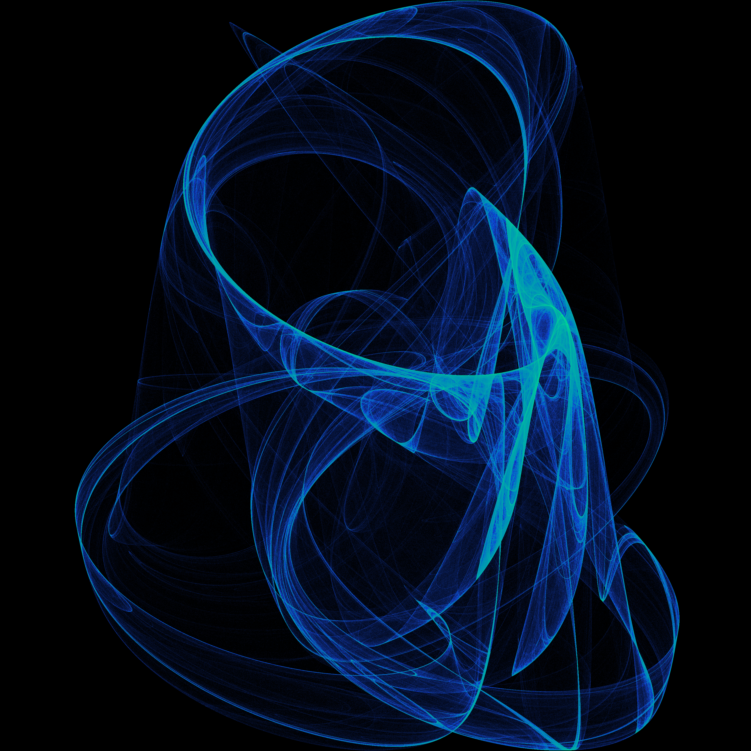

In [18]:
colors = two_schemes.(grid, CUTOFF, N_MAX, SCHEME1, SCHEME2, gamma1=0.9, gamma2=0.1)

save("background.png", image)

## Plot for background

Use 4k resolution: 3840x2160 - so use a 2160x3840 array

### Lock screen

In [22]:
# sidelength in pixels of image
X = 3840
d_X = 40
Y = 2160
d_Y = 45
# the max value for a pixel and the max value reached
MAX = 2000000

X0 = [1., 1.]
param = [0.7893333333333333, 1.3456666666666666, 4.533166666666666, 0.5728333333333333];

In [23]:
grid = peter_de_jong(param, MAX, X, Y, d_X, d_Y, spacing="bottom-left", N_max=2*10^9, threads=5);

Make a RGB-background for the non-uniform color plots

In [20]:
# initialize the RGB-grid
rgb = fill(RGB(0,0,0), Y, X)

# function to calculate the index of the colorscale to use at
# the position (i, j)
function calc_index(i, j, MAX, SIDE)
    scalew = SIDE/20
    scaleh = MAX/25
    temp = scaleh + i + scaleh*sin((i+j)/scalew)
    return ceil(Int64, MAX * temp/(SIDE+2*scaleh))
end

# fill the RGB-grid with the correct background colors
for i=1:Y
    for j=1:X
            rgb[i,j] = scale[calc_index(i, j, 500, Y)]
    end
end

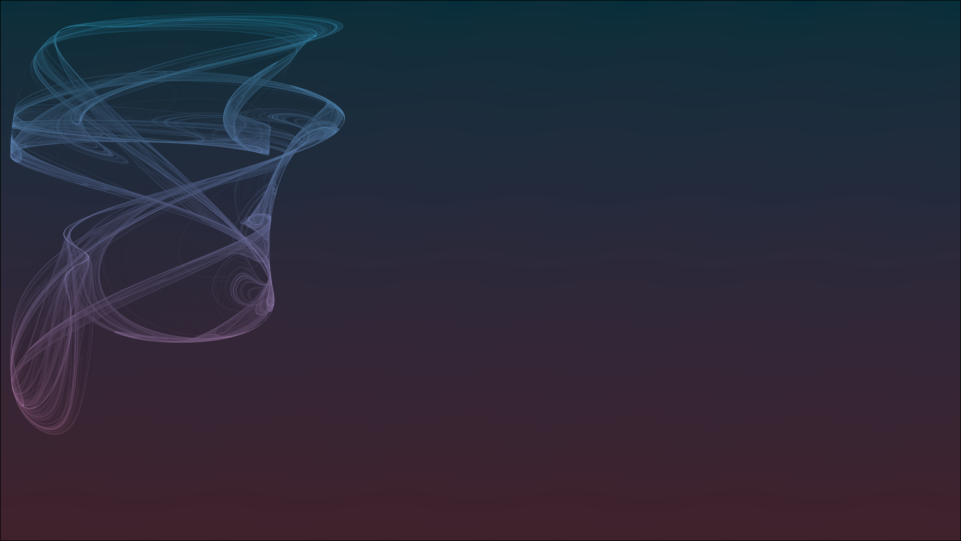

In [21]:
# render the image
GAMMA = fill(0.15, Y, X)
N_MAX = fill(MAX, Y, X)
base = ones(Y, X)*0.25
image = map(color_map_background, grid, N_MAX, GAMMA, rgb, base)

In [27]:
SCHEME1 = fill(scheme, Y, X);
SCHEME2 = fill(scheme2, Y, X);
sorted = sort(vec(grid));
cutoff = floor(Int64, percentile(sorted, 95));
CUTOFF = fill(cutoff, Y, X);
MAX = maximum(grid)
N_MAX = fill(MAX, Y, X);

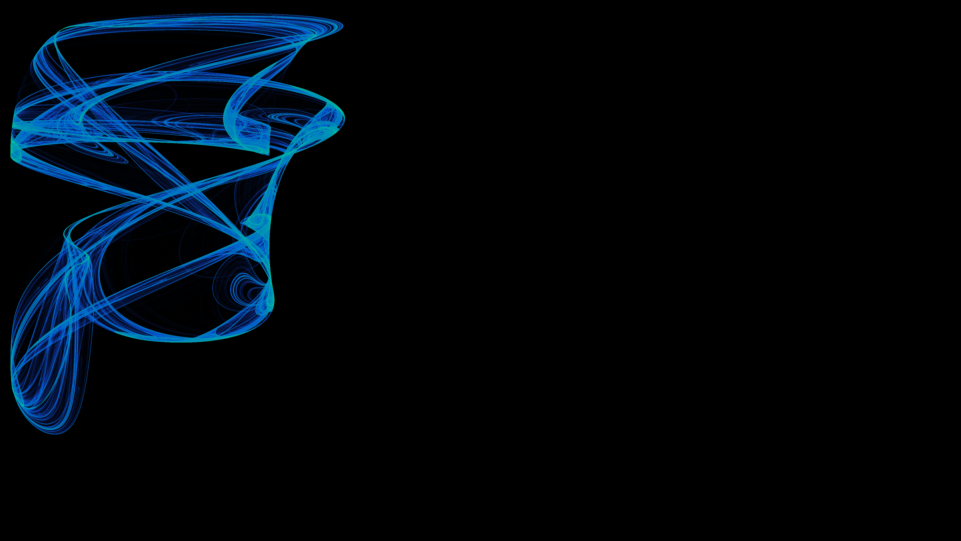

In [28]:
image = two_schemes.(grid[1:Y,1:X], CUTOFF, N_MAX, SCHEME1, SCHEME2, gamma1=0.45, gamma2=0.13)

In [29]:
#save the image
save("lock_screen.png", image)

### Background phone

In [4]:
# sidelength in pixels of image
X = 2160
d_X = 30
Y = 3840
d_Y = 80
# the max value for a pixel and the max value reached
MAX = 200000

X0 = [1., 1.]
param = [0.7893333333333333, 1.3456666666666666, 4.533166666666666, 0.5728333333333333];

In [6]:
grid = peter_de_jong(param, MAX, X, Y, d_X, d_Y, spacing="centered", N_max=2*10^9, threads=3);

Make a RGB-background for the non-uniform color plots

In [75]:
# initialize the RGB-grid
rgb = fill(RGB(0,0,0), Y, X)

# function to calculate the index of the colorscale to use at
# the position (i, j)
function calc_index(i, j, MAX, SIDE)
    scalew = SIDE/20
    scaleh = MAX/25
    temp = scaleh + i + scaleh*sin((i+j)/scalew)
    return ceil(Int64, MAX * temp/(SIDE+2*scaleh))
end

# fill the RGB-grid with the correct background colors
for i=1:Y
    for j=1:X
            rgb[i,j] = scale[calc_index(i, j, 500, Y)]
    end
end

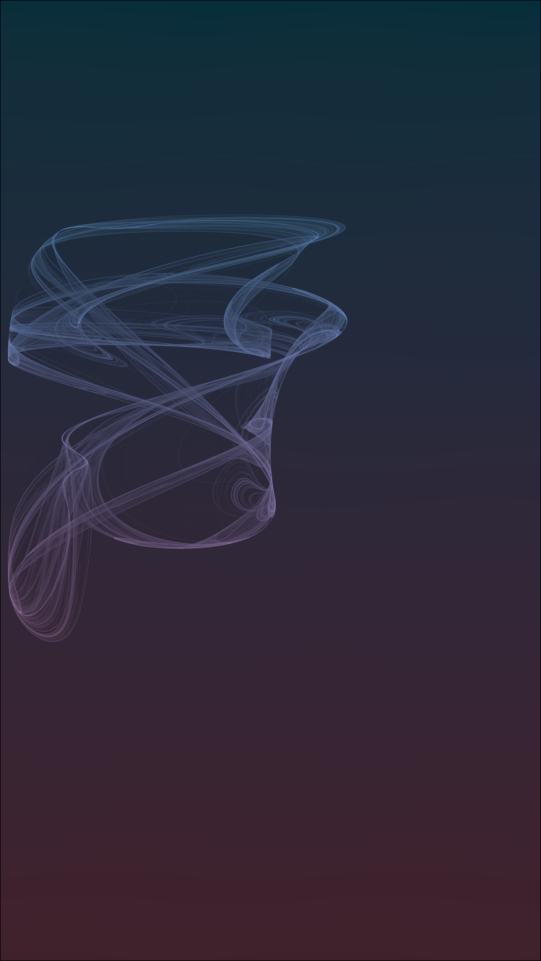

In [85]:
# render the image
GAMMA = fill(0.15, Y, X)
N_MAX = fill(MAX, Y, X)
base = ones(Y, X)*0.25
image = map(color_map_background, grid, N_MAX, GAMMA, rgb, base)

In [7]:
SCHEME1 = fill(scheme, Y, X);
SCHEME2 = fill(scheme2, Y, X);
sorted = sort(vec(grid));
cutoff = floor(Int64, percentile(sorted, 95));
CUTOFF = fill(cutoff, Y, X);
MAX = maximum(grid)
N_MAX = fill(MAX, Y, X);

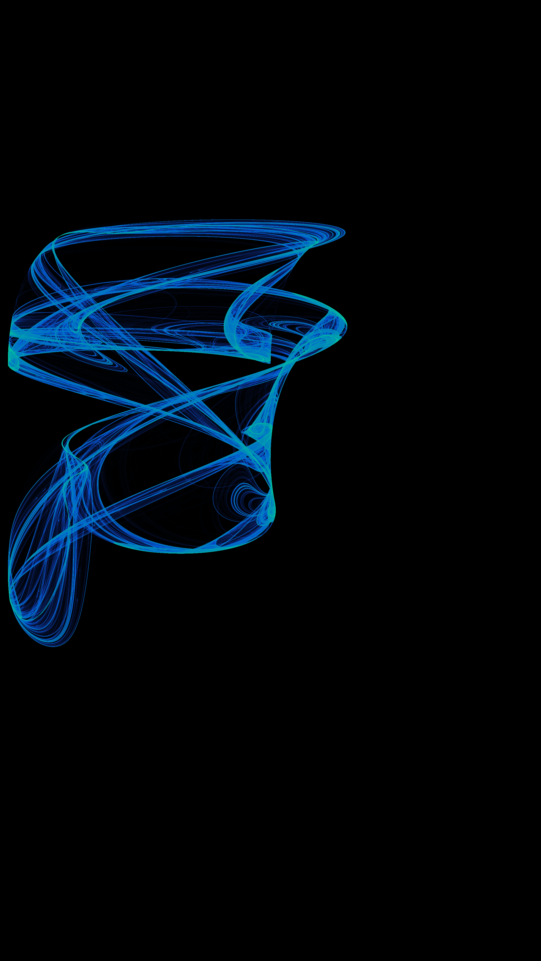

In [15]:
image = two_schemes.(grid[1:Y,1:X], CUTOFF, N_MAX, SCHEME1, SCHEME2, gamma1=0.45, gamma2=0.13)

In [16]:
save("background_phone.png", image)

### random stretched attractors

In [17]:
# sidelength in pixels of image
Y = 2160
d_X = 30
X = 3840
d_Y = 30
# the max value for a pixel and the max value reached
MAX = 200000

X0 = [1., 1.]
params = [[0.7893333333333333, 1.3456666666666666, 4.533166666666666, 0.5728333333333333],
    [0.37816666666666665, 10.6825, 9.304166666666667, 0.42133333333333334],
    [2.24367, 1.6935, 0.820333, 4.41617],
    [ 2.6475,  2.296333333333333,  3.2558333333333334,  1.7128333333333334 ],
    [ 1.3455,  2.737,  2.325,  1.1153333333333333]];

In [18]:
SCHEME1 = fill(scheme, Y, X);
SCHEME2 = fill(scheme2, Y, X);

In [21]:
i = 1
for param in params
    grid = peter_de_jong(param, MAX, X, Y, d_X, d_Y, spacing="stretched", N_max=2*10^9, threads=3);
    sorted = sort(vec(grid));
    cutoff = floor(Int64, percentile(sorted, 95));
    CUTOFF = fill(cutoff, Y, X);
    MAX = maximum(grid)
    N_MAX = fill(MAX, Y, X);
    image = two_schemes.(grid, CUTOFF, N_MAX, SCHEME1, SCHEME2, gamma1=0.45, gamma2=0.13);
    str = @sprintf("%04d", i);
    i += 1;
    save("stretched_$str.png", image);
end

### background with stretched image

In [62]:
# sidelength in pixels of image
X = 3840 + 250
Y = 2160 + 540
d_X = 100
d_Y = 100
# the max value for a pixel and the max value reached
MAX = 160000

X0 = [1., 1.]
param = [7.3305,  0.8646666666666667,  0.37083333333333335,  6.1305 ]
#param = rand(UInt16, 4)/6000
grid = peter_de_jong(param, MAX, X, Y, d_X, d_Y, spacing="stretched", N_max=2*10^9, 
    threads=5);

In [63]:
# initialize the RGB-grid
Y = 2160
X = 3840
rgb = fill(RGB(0,0,0), Y, X)

# function to calculate the index of the colorscale to use at
# the position (i, j)
function calc_index(i, j, MAX, SIDE)
    scalew = SIDE/20
    scaleh = MAX/25
    temp = scaleh + i + scaleh*sin((i+j)/scalew)
    return ceil(Int64, MAX * temp/(SIDE+2*scaleh))
end

# fill the RGB-grid with the correct background colors
for i=1:Y
    for j=1:X
            rgb[i,j] = scale[calc_index(i, j, 500, Y)]
    end
end

UndefVarError: UndefVarError: scale not defined

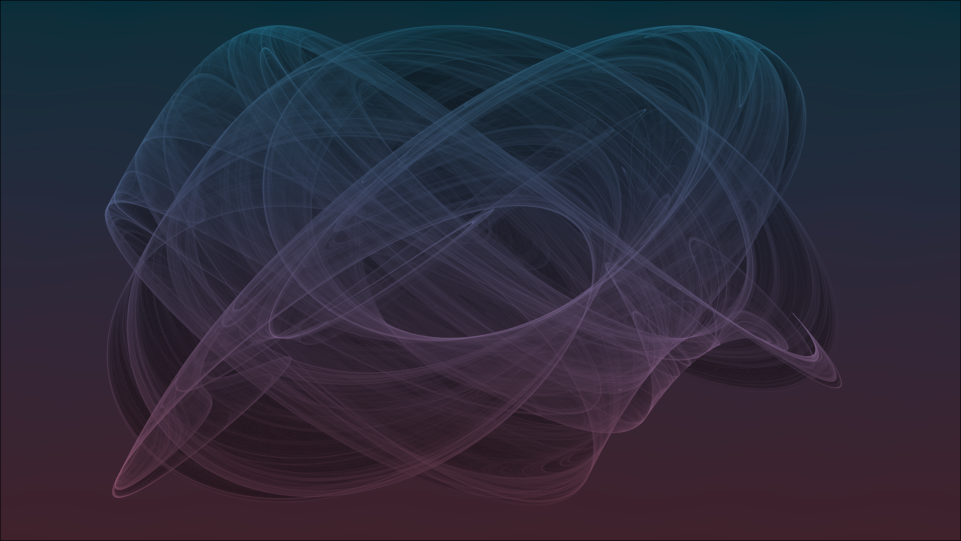

In [24]:
GAMMA = fill(0.21, Y, X)
N_MAX = fill(MAX, Y, X)
base = ones(Y, X)*0.25
image = map(color_map_background, grid[1:Y,1:X], N_MAX, GAMMA, rgb, base)

In [64]:
SCHEME1 = fill(scheme, Y, X);
SCHEME2 = fill(scheme2, Y, X);
sorted = sort(vec(grid));
cutoff = floor(Int64, percentile(sorted, 95));
CUTOFF = fill(cutoff, Y, X);
MAX = maximum(grid)
N_MAX = fill(MAX, Y, X);

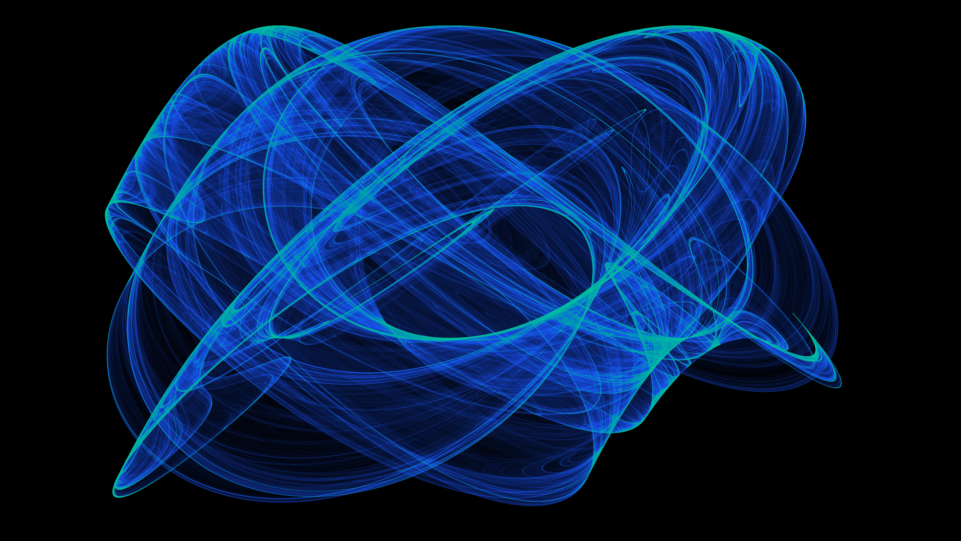

In [72]:
image = two_schemes.(grid[1:Y,1:X], CUTOFF, N_MAX, SCHEME1, SCHEME2, gamma1=1.5, gamma2=0.09)

In [73]:
save("background.png", image)

# continuously changing parameters

In [21]:
step = 0.00075
# the amount of images to compute in one go (parallel)
steps = 64
# sidelength in pixels of image
X = fill(1080, steps)
Y = fill(720, steps)
# the max value for a pixel and the max value reached
MAX = fill(3500, steps)

param0 = [7.3305,0.8646666666666667, 0.37083333333333335, 6.1305];
grids = fill(zeros(Int64, Y[1], X[1]), steps);
X0 = fill([1., 1.], steps);

In [24]:
corner1 = [7.3305, 0.8646666666666667, 0.37083333333333335, 6.1305]
corner2 = [0.7893333333333333, 1.3456666666666666, 4.533166666666666, 0.5728333333333333]
corner3 = [0.37816666666666665, 10.6825, 9.304166666666667, 0.42133333333333334]
corners = [corner1, corner2, corner3]
vec1 = corner2 .- corner1
vec2 = corner3 .- corner2
vec3 = corner1 .- corner3
vecs = [vec1, vec2, vec3]

# a function to calculate the nth set of parameters
function circle_params(n, n_max, corners, vecs)
    progression = n/n_max
    param = []
    if progression <= 1/3
        param = corners[1] .+ 3*progression*vecs[1]
    elseif progression <= 2/3
        progression = progression - 1/3
        param = corners[2] .+ 3*progression*vecs[2]
    else
        progression = progression - 2/3
        param = corners[3] .+ 3*progression*vecs[3]
    end
    return param
end

circle_params (generic function with 2 methods)

Initialize arrays to generate the image

In [11]:
x = X[1];
y = Y[1];
n_max = ones(y, x) * MAX[1];
gamma = ones(y, x) * 0.21;
base = ones(y, x)*0.25
#rgb = fill(vermillion, side, side);

In [12]:
# initialize the RGB-grid
rgb = fill(RGB(0,0,0), y, x)

# function to calculate the index of the colorscale to use at
# the position (i, j)
function calc_index(i, j, MAX, SIDE)
    scalew = SIDE/20
    scaleh = MAX/25
    temp = scaleh + i + scaleh*sin((i+j)/scalew)
    return ceil(Int64, MAX * temp/(SIDE+2*scaleh))
end

# fill the RGB-grid with the correct background colors
for i=1:y
    for j=1:x
            rgb[i,j] = scale[calc_index(i, j, 500, y)]
    end
end

finding a balance between the amount of points calculated, the quality of the image and the time taken

In [13]:
hist = calc_hist(grid[1], param0[1], 2500, X[1], SIDE[1], SIDE[1]);
sum(hist)

17028408

In [30]:
@benchmark hist = calc_n_points(grid[1], param0[1], 20*10^6, X[1], 720, 720)
#maximum(hist)

BenchmarkTools.Trial: 
  memory estimate:  1.79 GiB
  allocs estimate:  20000000
  --------------
  minimum time:     4.529 s (5.49% GC)
  median time:      4.568 s (5.58% GC)
  mean time:        4.568 s (5.58% GC)
  maximum time:     4.607 s (5.68% GC)
  --------------
  samples:          2
  evals/sample:     1

In [28]:
hist = calc_n_points(grid[1], param0[1], 20*10^6, X[1], 720, 720);

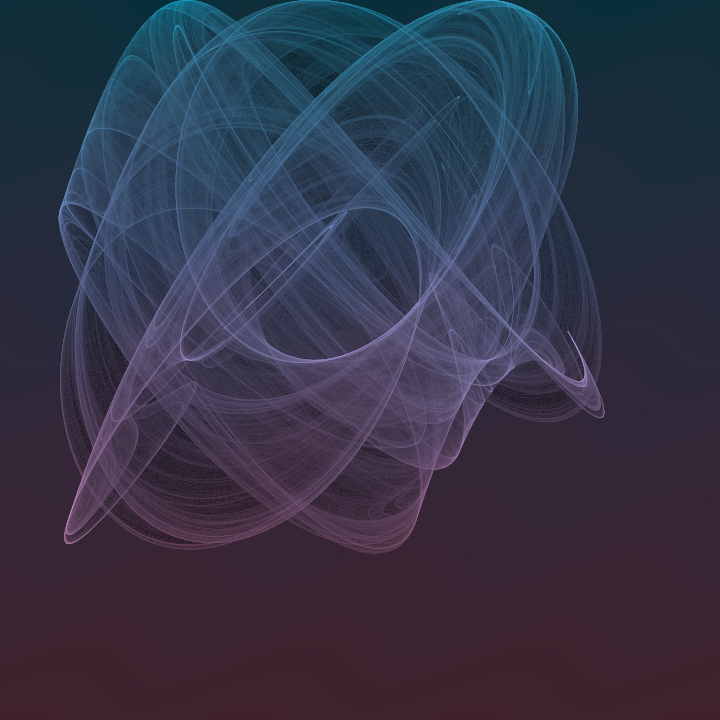

In [29]:
color_map_background.(hist, maximum(hist), gamma, rgb, base)

In [25]:
rounds = 156
N = fill(30*10^6, steps)
for i=51:105
    params = [circle_params(steps*i+j, steps*rounds, corners, vecs) for j=1:steps];
    hists = pmap(calc_n_points, grids, params, N, X0, X, Y)
    for j=1:steps
        str = @sprintf("%04d", steps*i+j)
        save("plots_circle/frame_$str.png", color_map_background.(hists[j], maximum(hists[j]), gamma, rgb, base))
    end
end

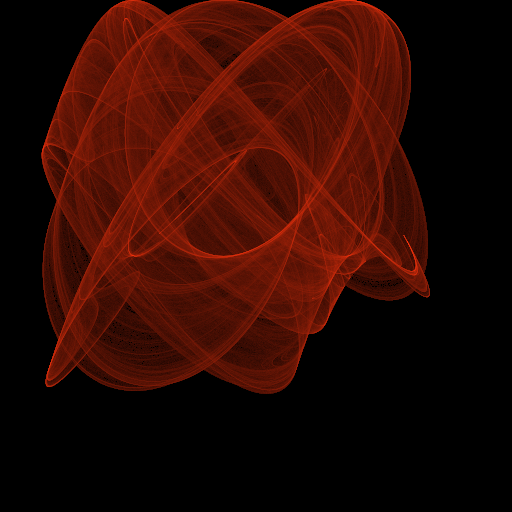

In [41]:
linear_color.(hists[1], n_max, alpha, rgb)

In [42]:
#stitch all the different grids together into 1 composite grid
row = hists[1]

for i = 2:10
    row = hcat(row, hists[i])
end

composite = row

for i = 1:9
    row = hists[10*i+1]
    for j = (10*i+2):(10*(i+1))
        row = hcat(row, hists[j])
    end
    composite = vcat(composite, row)
end

In [43]:
side = SIDE[1]*10;
n_max = ones(side, side) * MAX[1];
alpha = ones(side, side) * 0.25;
rgb = fill(vermillion, side, side);

In [46]:
save("test_animation.png", linear_color.(composite, n_max, alpha, rgb))

## test parallel computing

In [35]:
@benchmark grid = peter_de_jong(param, 10000, X, Y, d_X, d_Y, spacing="stretched")

BenchmarkTools.Trial: 
  memory estimate:  238.55 MiB
  allocs estimate:  6270
  --------------
  minimum time:     42.922 s (0.06% GC)
  median time:      42.922 s (0.06% GC)
  mean time:        42.922 s (0.06% GC)
  maximum time:     42.922 s (0.06% GC)
  --------------
  samples:          1
  evals/sample:     1

In [36]:
@benchmark grid = peter_de_jong(param, 10000, X, Y, d_X, d_Y, spacing="stretched", threads=processes)

BenchmarkTools.Trial: 
  memory estimate:  510.70 MiB
  allocs estimate:  6053
  --------------
  minimum time:     29.243 s (0.70% GC)
  median time:      29.243 s (0.70% GC)
  mean time:        29.243 s (0.70% GC)
  maximum time:     29.243 s (0.70% GC)
  --------------
  samples:          1
  evals/sample:     1

## Make a composite image of candidate attractors

No need to run this again after saving the params

side = 500
params, grids = search_params(400, side);

#stitch all the different grids together into 1 composite grid
row = grids[1]

for i = 2:20
    row = hcat(row, grids[i])
end

composite = row

for i = 1:19
    row = grids[20*i+1]
    for j = (20*i+2):(20*(i+1))
        row = hcat(row, grids[j])
    end
    composite = vcat(composite, row)
end

str = ""
for i = 1:400
    param = params[i]
    str *= "$i: ["
    for a in param
        str *= " $a "
    end
    str *= "]\n"
end
print(str)

#make a grayscale image from the composite grid and save it
GAMMA = fill(0.25, side*20, side*20)
image = map(map_gray, composite, GAMMA)
save("composite attractors.png", image)